<a href="https://colab.research.google.com/github/JulianSilva2001/Image-Fitting/blob/main/Image_Superimposing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

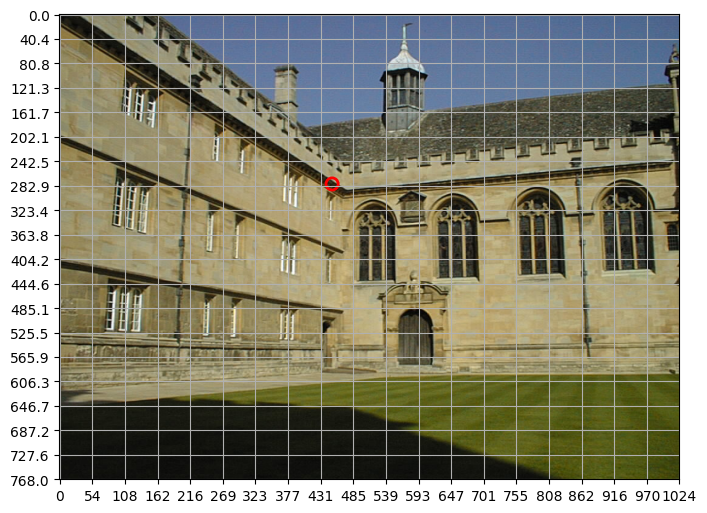

In [26]:
architectural_img = cv.imread('/content/drive/MyDrive/Image Fitting/005.jpg')
flag_img = cv.imread('/content/drive/MyDrive/Image Fitting/flag.png')

architectural_img_rgb = cv.cvtColor(architectural_img, cv.COLOR_BGR2RGB)
flag_img_rgb = cv.cvtColor(flag_img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(architectural_img_rgb, cmap='gray')


ax = plt.gca()

# Create the circle (for a point, you can use a very small radius, like 10)
circle = plt.Circle((450, 280), 10, color='r', fill=False, linewidth=2)

# Add the circle to the plot
ax.add_artist(circle)
plt.axis('on')
plt.grid(True)

num_ticks = 20  # Set the number of ticks (and thus grid lines)
x_ticks = np.linspace(0, architectural_img_rgb.shape[1], num_ticks)  # X-axis ticks
y_ticks = np.linspace(0, architectural_img_rgb.shape[0], num_ticks)  # Y-axis ticks

plt.xticks(x_ticks)
plt.yticks(y_ticks)

# Display the plot
plt.show()


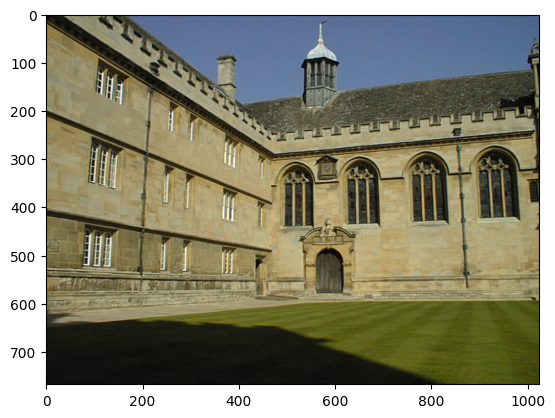

Clicked points: []


In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# List to store clicked points
clicked_points = []

# Function to capture click events in matplotlib
def onclick(event):
    global clicked_points
    # Check if the mouse button was clicked
    if event.xdata is not None and event.ydata is not None:
        x, y = int(event.xdata), int(event.ydata)
        clicked_points.append((x, y))
        # Plot the clicked point on the image
        plt.plot(x, y, 'ro')  # 'ro' means red circle
        plt.draw()  # Redraw the image with the new point

        print(f'Clicked point: ({x}, {y})')

# Load the image
img = cv.imread('/content/drive/MyDrive/Image Fitting/005.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Display the image using matplotlib
fig, ax = plt.subplots()
ax.imshow(img_rgb)

# Connect the click event handler
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

# Print clicked points after the window is closed
print("Clicked points:", clicked_points)


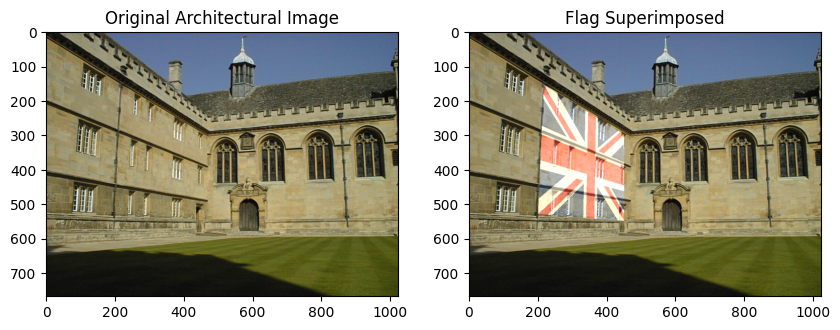

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# Select four points on the architectural image (e.g., manually or using a mouse event)
# For example, these could be the four corners of a rectangular region on the building.
architectural_pts = np.float32([[216, 155], [450, 300], [450, 550], [200, 530]])  # Example points on the image

# The four corners of the flag image
flag_pts = np.float32([[0, 0], [flag_img.shape[1], 0], [flag_img.shape[1], flag_img.shape[0]], [0, flag_img.shape[0]]])

# Compute the homography matrix H
H, status = cv.findHomography(flag_pts, architectural_pts)

# Warp the flag image to the architectural image using the homography
warped_flag = cv.warpPerspective(flag_img, H, (architectural_img.shape[1], architectural_img.shape[0]))

# Create a mask for the flag to blend it into the architectural image
flag_mask = np.zeros_like(architectural_img, dtype=np.uint8)
cv.fillConvexPoly(flag_mask, np.int32(architectural_pts), (255, 255, 255))

# Blend the warped flag into the architectural image
blended_img = cv.addWeighted(architectural_img, 1, warped_flag, 0.5, 0)

# Convert the blended image to RGB for displaying
blended_img_rgb = cv.cvtColor(blended_img, cv.COLOR_BGR2RGB)

# Display the original and the superimposed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(architectural_img_rgb)
plt.title('Original Architectural Image')

plt.subplot(1, 2, 2)
plt.imshow(blended_img_rgb)
plt.title('Flag Superimposed')

plt.show()


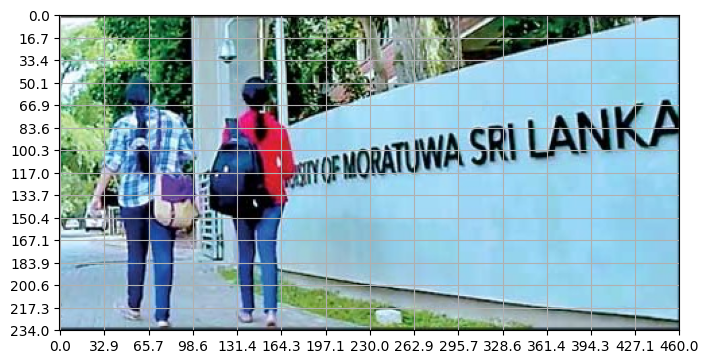

In [34]:
architectural_img = cv.imread('/content/drive/MyDrive/Image Fitting/uni.jpg')
flag_img = cv.imread('/content/drive/MyDrive/Image Fitting/logo-removebg-preview.png')

architectural_img_rgb = cv.cvtColor(architectural_img, cv.COLOR_BGR2RGB)
flag_img_rgb = cv.cvtColor(flag_img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(architectural_img_rgb, cmap='gray')


ax = plt.gca()

# Create the circle (for a point, you can use a very small radius, like 10)
circle = plt.Circle((450, 280), 10, color='r', fill=False, linewidth=2)

# Add the circle to the plot
ax.add_artist(circle)
plt.axis('on')
plt.grid(True)

num_ticks = 15  # Set the number of ticks (and thus grid lines)
x_ticks = np.linspace(0, architectural_img_rgb.shape[1], num_ticks)  # X-axis ticks
y_ticks = np.linspace(0, architectural_img_rgb.shape[0], num_ticks)  # Y-axis ticks

plt.xticks(x_ticks)
plt.yticks(y_ticks)

# Display the plot
plt.show()


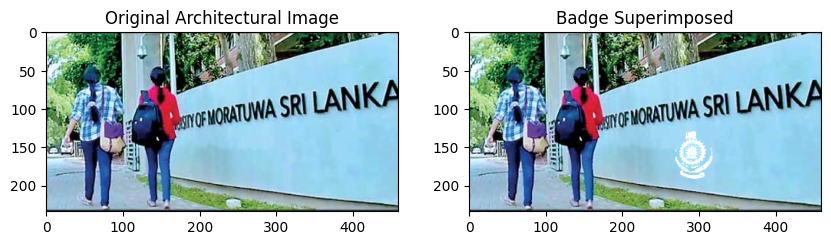

In [42]:

# Select four points on the architectural image (e.g., manually or using a mouse event)
# For example, these could be the four corners of a rectangular region on the building.
architectural_pts = np.float32([[262, 133], [328, 120], [328, 200], [262, 190]])  # Example points on the image

# The four corners of the flag image
flag_pts = np.float32([[0, 0], [flag_img.shape[1], 0], [flag_img.shape[1], flag_img.shape[0]], [0, flag_img.shape[0]]])

# Compute the homography matrix H
H, status = cv.findHomography(flag_pts, architectural_pts)

# Warp the flag image to the architectural image using the homography
warped_flag = cv.warpPerspective(flag_img, H, (architectural_img.shape[1], architectural_img.shape[0]))

# Create a mask for the flag to blend it into the architectural image
flag_mask = np.zeros_like(architectural_img, dtype=np.uint8)
cv.fillConvexPoly(flag_mask, np.int32(architectural_pts), (255, 255, 255))

# Blend the warped flag into the architectural image
blended_img = cv.addWeighted(architectural_img, 1, warped_flag, 0.9, 0)

# Convert the blended image to RGB for displaying
blended_img_rgb = cv.cvtColor(blended_img, cv.COLOR_BGR2RGB)

# Display the original and the superimposed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(architectural_img_rgb)
plt.title('Original Architectural Image')

plt.subplot(1, 2, 2)
plt.imshow(blended_img_rgb)
plt.title('Badge Superimposed')

plt.show()